# NCS proteins
Their influence of spiking activity of neurons <br>
## Table of contents:<br>
-  Displaying distribution of mechanisms<br>
-  Preparing for simulations<br>
-  **A. sAHP during IPulses**<br>
-  **B. IPulses at soma + translocations**<br>
-  **C. AlphaSynapse**

	1 
	1 


<IPython.core.display.Javascript object>


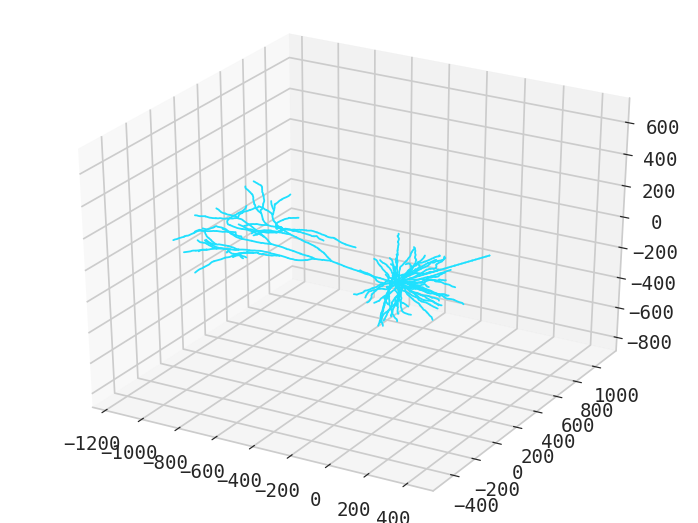

<neuron._PlotShapePlot.__call__.<locals>._get_pyplot_axis3d.<locals>.Axis3DWithNEURON at 0x7f3af32491c0>

In [1]:
from neuron import h, gui
from neuron.units import ms, mV
from neuron_tools import *
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import style, rc
import numpy as np
import pickle
h.load_file("stdrun.hoc");
style.use("seaborn")
h.load_file('SK2017_mosinit.hoc')
from jupyterthemes import jtplot
jtplot.style()

%matplotlib notebook
font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 12}

rc('font', **font);
plt.rc('axes', titlesize=15);     # fontsize of the axes title
plt.rc('axes', labelsize=14);
h.PlotShape(False).plot(plt)

# Displaying distribution of mechanisms

# Preparing for simulations

In [1]:
print(h.dend11[10].k8HPCA_hpca)

for i in range(10, 21):
    sec = h.dend11[i]
    sec.insert("hpca")
    sec.uninsert("Ca_HVA")
    sec.insert("cal")
    sec.uninsert("cad")
    print('%s: %s' % (sec, ', '.join(sec.psection()['density_mechs'].keys())))

# Setting recording variables
v = h.Vector().record(h.dend11[10](0.5)._ref_v)
cai = h.Vector().record(h.dend11[10](.5)._ref_cai)
hpca_m = h.Vector().record(h.dend11[10](0.5)._ref_HPCA_m_hpca[0])
sahpc = h.Vector().record(h.dend11[10](0.5)._ref_ik_hpca)
t = h.Vector().record(h._ref_t)
h.celsius = 23

NameError: name 'h' is not defined

# A. sAHP during IPulses

In [5]:
def sahpc_APs(out=0.002, num = 20):
    h.k8HPCA_hpca = out
    ic = h.Ipulse2(h.soma(.5))
    ic.delay = 4000
    ic.dur = 1 # ms
    ic.per = 20 # ms
    ic.amp = 35 # nA
    
    ic.num = num
    h.finitialize()
    h.continuerun(16000 * ms)
    return sahpc*1000

In [60]:
def sahpc_APs_curve(out=0.002, t=t):
    h.k8HPCA_hpca = out
    ic = h.Ipulse2(h.soma(.5))
    ic.delay = 4000
    ic.dur = 1 # ms
    ic.per = 20 # ms
    ic.amp = 35 # nA
    sahpc_aps = []
    t = h.Vector().record(h._ref_t)
    for num in range(10, 110, 10):
        ic.num = num
        h.finitialize()
        h.continuerun(5000 * ms)
        y = np.array(sahpc * 1000)
        t = np.array(t)
        sahpc_time = np.where(t > 5000)
        sahpc_aps.append([num, np.max(y[sahpc_time[0]])])
    return sahpc_aps

In [61]:
sahpc_aps_HPCA = sahpc_APs_curve(out=0.002)
sahpc_aps_NCALD = sahpc_APs_curve(out=7.7e-5)

In [62]:
print(sahpc_aps_HPCA)
print(sahpc_aps_NCALD)

[[10, 0.30444035465327923], [20, 0.3002618641989986], [30, 0.2955833214699918], [40, 0.2904576249506649], [50, 0.28513292158682146], [60, 0.26705911756538325], [70, 0.25081398185371095], [80, 0.23859412427666174], [90, 0.23258481282874335], [100, 0.19742721607170155]]
[[10, 0.5407696901874721], [20, 0.53100654634765], [30, 0.5208930367038157], [40, 0.5108385582511038], [50, 0.5014498046216079], [60, 0.4732221568093683], [70, 0.450707542789426], [80, 0.4356758191449041], [90, 0.42912609709347715], [100, 0.3661229660395053]]


In [64]:
with open("Results/Ipulses_translocation/max_sAHPcurrent.p", "wb") as f:
    pickle.dump({"sahpc_aps_HPCA" : sahpc_aps_HPCA, 
                "sahpc_aps_NCALD" : sahpc_aps_NCALD}, f)

<IPython.core.display.Javascript object>


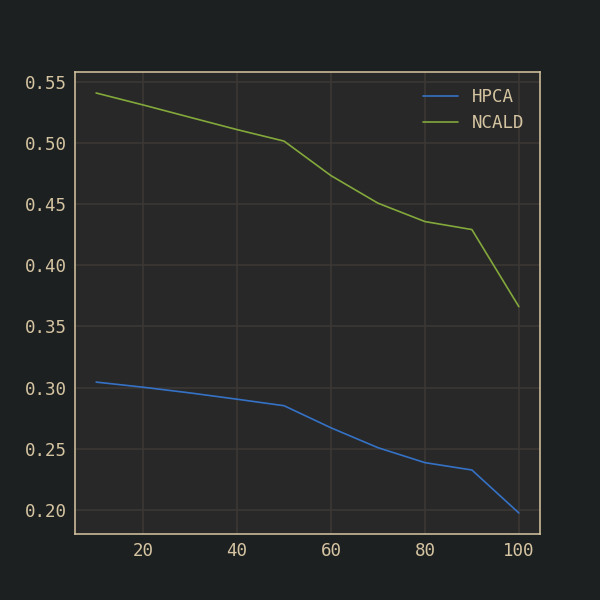

In [66]:
def make_dependence_curve(array1, array2):
    plt.figure(figsize=(6, 6))
    array1 = np.array(array1)
    array2 = np.array(array2)
    plt.plot(array1[:,0], array1[:,1], label="HPCA")
    plt.plot(array2[:,0], array2[:,1], label="NCALD")
    plt.legend()
    plt.show()

make_dependence_curve(sahpc_aps_HPCA, sahpc_aps_NCALD)

In [9]:
def make_subplots(var1, var2, var3, titles=["20 APs", "50 APs", "100 APs"], ylabel="uA/cm2"):
    '''
    Make three subplots with using 3 given variables, quite popular number
    '''
    fig, axes = plt.subplots(3, 1, figsize=(10, 10))

    axes[0].plot(t/1000, var1, lw=2, c='green')
    axes[0].set_title(titles[0]) 

    v50 = v
    axes[1].plot(t/1000, var2, lw=2, c='orange')
    axes[1].set_title(titles[1]) 

    axes[2].plot(t/1000, var3, lw=2, c='red')
    axes[2].set_title(titles[2]) 

    for ax in axes.flat:
        ax.set(ylabel=ylabel)
        ax.set_ylim(0, 1)

    axes[2].set(xlabel="time [ms]")
    fig.tight_layout()
    plt.show()

In [7]:
var1 = sahpc_APs(out=0.002, num=20)
var2 = sahpc_APs(out=0.002, num=50)
var3 = sahpc_APs(out=0.002, num=100)


<IPython.core.display.Javascript object>


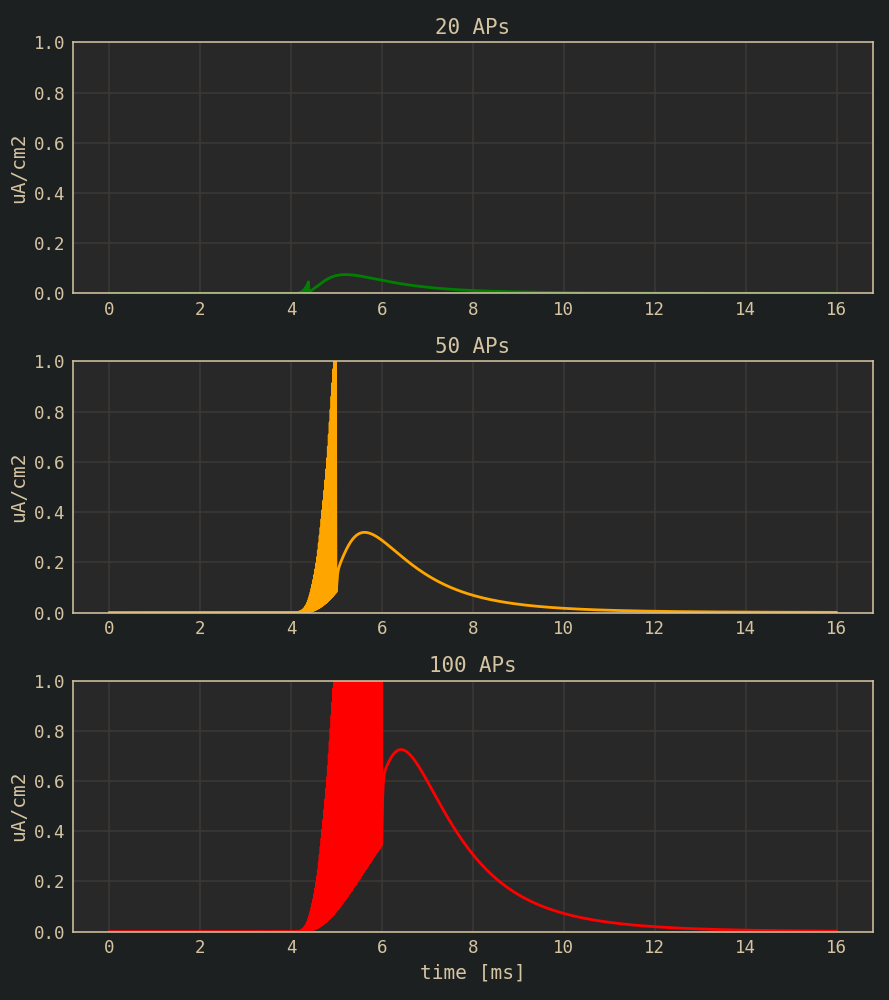

In [10]:
make_subplots(var1, var2, var3, titles=["20 APs", "50 APs", "100 APs"], ylabel="uA/cm2")

# B. IPulses at soma + translocations
Simulation of HPCA and N75K translocation and sAHP in response to a train of 100 APs @ 50 Hz in a neuron co-expressing both proteins. An insert shows sAHP
currents (upper traces) and sAHP (lower traces) following short (5 APs) trains for a neuron expressing either WT HPCA or N75K mutant. Note a substantial decrease
in sAHP current and sAHP for the neuron expressing N75K instead of WT HPCA.

### Simulation

In [3]:
def transloc_APs(out = 0.002, start=10, finish=100, step=10):
    ic = h.Ipulse2(h.soma(.5))
    ic.delay = 4000
    ic.dur = 1 # ms
    ic.per = 20 # ms
    ic.amp = 35 # nA
    h.k8HPCA_hpca = out
    max_transloc = []
    for i in range(start, finish, step):
        ic.num = i # number of current pulses
        h.finitialize()
        h.continuerun(10000 * ms)
        y = np.array(hpca_m*1000)
        max_transloc.append([i, np.max(y)])
    return max_transloc

In [23]:
max_transloc_HPCA = transloc_APs(out=0.002)
max_transloc_NCALD = transloc_APs(out=7.7e-5)
print(max_transloc_HPCA)
print(max_transloc_NCALD)

[[10, 0.3937468478932672], [20, 0.48093814515165306], [30, 0.816082631298699], [40, 1.2783816457638717], [50, 1.7945241767263436], [60, 2.3387525991379943], [70, 2.89185924380237], [80, 3.439780668265046], [90, 3.972185415747722]]
[[10, 1.6049797663762206], [20, 1.9860543140778464], [30, 2.956482900459188], [40, 4.171359653670333], [50, 5.561567642485442], [60, 7.0781654287468205], [70, 8.685861950941144], [80, 10.358373449158837], [90, 12.07456863560113]]


In [18]:
with open("Results/Ipulses_translocation/max_transloc.p", "wb") as f:
    pickle.dump({"max_transloc_HPCA" : max_transloc_HPCA, 
                "max_transloc_NCALD" : max_transloc_NCALD}, f)

In [4]:
with open("Results/Ipulses_translocation/max_transloc.p", "rb") as f:
    data = pickle.load(f)
    
max_transloc_HPCA = data["max_transloc_HPCA"]
max_transloc_NCALD = data["max_transloc_NCALD"]
print(max_transloc_HPCA)

[[10, 0.3937468478932672], [20, 0.48093814515165306], [30, 0.816082631298699], [40, 1.2783816457638717], [50, 1.7945241767263436], [60, 2.3387525991379943], [70, 2.89185924380237], [80, 3.439780668265046], [90, 3.972185415747722]]


In [5]:
max_transloc_HPCA = np.array(max_transloc_HPCA)
max_transloc_NCALD = np.array(max_transloc_NCALD)

<IPython.core.display.Javascript object>


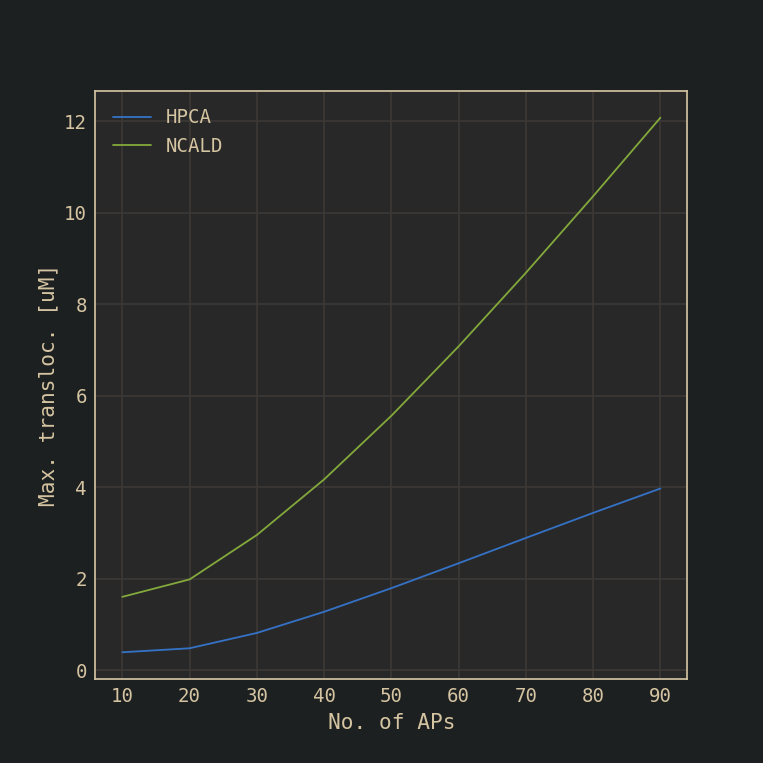

In [16]:
plt.figure(figsize=(7,7))
plt.plot(max_transloc_HPCA[:,0], max_transloc_HPCA[:,1], label="HPCA")
plt.plot(max_transloc_NCALD[:,0], max_transloc_NCALD[:,1], label="NCALD")
plt.legend()
plt.xlabel("No. of APs")
plt.ylabel("Max. transloc. [uM]")
plt.show()

### Plotting 

<IPython.core.display.Javascript object>


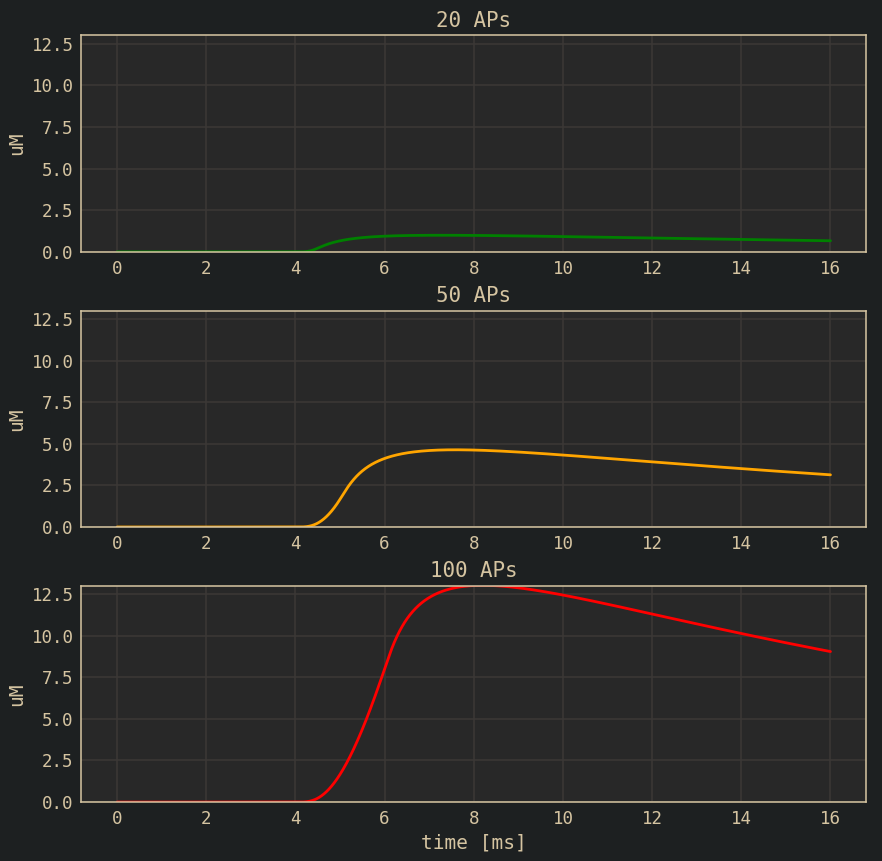

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

ax1.plot(t/1000, hpca_20APs, lw=2, c='green')
ax1.set_title('20 APs') 

v50 = v
ax2.plot(t/1000, hpca_50APs, lw=2, c='orange')
ax2.set_title('50 APs') 

ax3.plot(t/1000, hpca_100APs, lw=2, c='red')
ax3.set_title('100 APs') 

ax1.set(ylabel="uM")
ax1.set_ylim(0, 13)
ax2.set(ylabel="uM")
ax2.set_ylim(0, 13)
ax3.set(xlabel="time [ms]", ylabel="uM")
ax3.set_ylim(0, 13)
fig.tight_layout()

plt.show()

In [12]:
with open('Results/Ipulses_translocation/Ipulses_NCALD_transloc.p', 'wb') as f:
    pickle.dump({'t': t, 'ncald_20APs': hpca_20APs, 'ncald_50APs': hpca_50APs, 'ncald_100APs': hpca_100APs,
                'v20':v20, 'v50':v50, 'v100':v100}, f)

NameError: name 'hpca_20APs' is not defined

# C. AlphaSynapse
transient activation of glutamatergic conductance (bottom trace) evoked a stronger burst of somatic APs in a model with N75K mutant compared to one with WT
HPCA demonstrating slower adaptation and higher excitability produced by the mutation. The conductance was located at a red-marked site of the dendritic tree
shown in the insert.

In [7]:
 print('%s: %s' % (h.dend11[10], ', '.join(h.dend11[10].psection()['density_mechs'].keys())))

dend11[10]: pas, cal, hpca, it2, kca, km, na


## ISI interval curves for HPCA and NCALD

In [6]:
def ISI_APs(out=0.002):
    '''
    Calculate interspike intervals in soma in response to synaptic input in the dendrite
    after current pulses in soma.
    '''
    h.k8HPCA_hpca = out # (/ms) --- constant for protein removal from the memb 
    
    # create pulse generator at soma
    ic = h.Ipulse2(h.soma(0.5))
    ic.num = 100
    ic.amp = 35
    ic.per = 20
    ic.dur = 1
    ic.delay = 5
    
    
    syn = h.AlphaSynapse(h.dend11[58](0.3125))
    syn.gmax = 0.1 # uS
    syn.onset = 4000 # ms
    syn.tau = 100 # ms
    i_syn = h.Vector().record(syn._ref_i)
    v_soma = h.Vector().record(h.soma(0.5)._ref_v)
    
    # action potential counter
    apc = h.APCount(h.soma(0.5))
    apc.thresh = 0 * mV
    crossing_times = h.Vector() # store APs times
    apc.record(crossing_times)
    AP_times = dict()
    for num_APs in [5, 10, 20, 40, 50, 80, 100, 110]:
        print(num_APs)
        ic.num = num_APs
        h.finitialize()
        h.continuerun(5000 * ms)
        y = np.array(crossing_times)
        AP_times[num_APs] = y[y > 4000]
        
    AP_numbers = []
    for key, val in AP_times.items():
        AP_numbers.append([key, len(val)/2])
    AP_numbers = np.array(AP_numbers)

    AP_finishes = []
    for key, val in AP_times.items():
        AP_finishes.append([key, val[1::2]])

    for i in AP_finishes:
        i[1] = np.mean(np.diff(i[1]))
        
    return AP_finishes
    

In [7]:
AP_finishes_HPCA = ISI_APs(out=0.002)
AP_finishes_NCALD = ISI_APs(out=7.7e-5)

5
10
20
40
50
80
100
110
5
10
20
40
50
80
100
110


/home/arsentii/anaconda3/envs/modelling/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/arsentii/anaconda3/envs/modelling/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
with open("Results/AlphaSyn_Ipulses_ISI/ISI/ISI_APs.p", "wb") as f:
    pickle.dump({"t": t, "AP_finishes_HPCA": AP_finishes_HPCA,
                "AP_finishes_NCALD": AP_finishes_NCALD}, f)

### Working with acquired AP times 

<IPython.core.display.Javascript object>


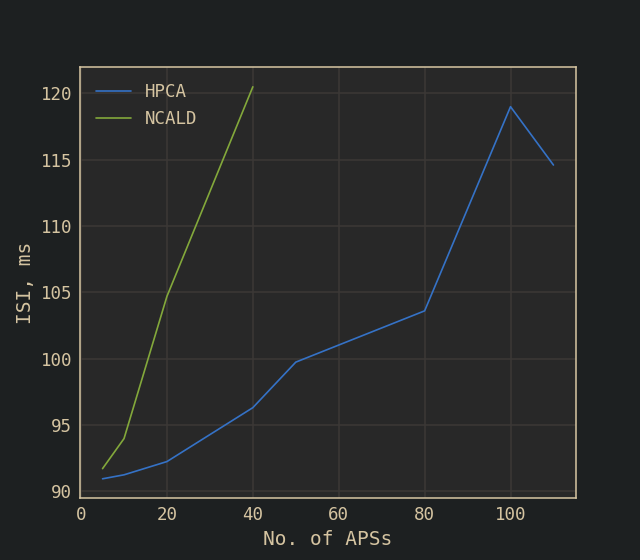

In [14]:
AP_finishes_HPCA = np.array(AP_finishes_HPCA)
AP_finishes_NCALD = np.array(AP_finishes_NCALD)

plt.plot(AP_finishes_HPCA[:,0], AP_finishes_HPCA[:,1], label="HPCA")
plt.plot(AP_finishes_NCALD[:5,0], AP_finishes_NCALD[:5,1], label="NCALD")
plt.ylabel("ISI, ms")
plt.xlabel("No. of APSs")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


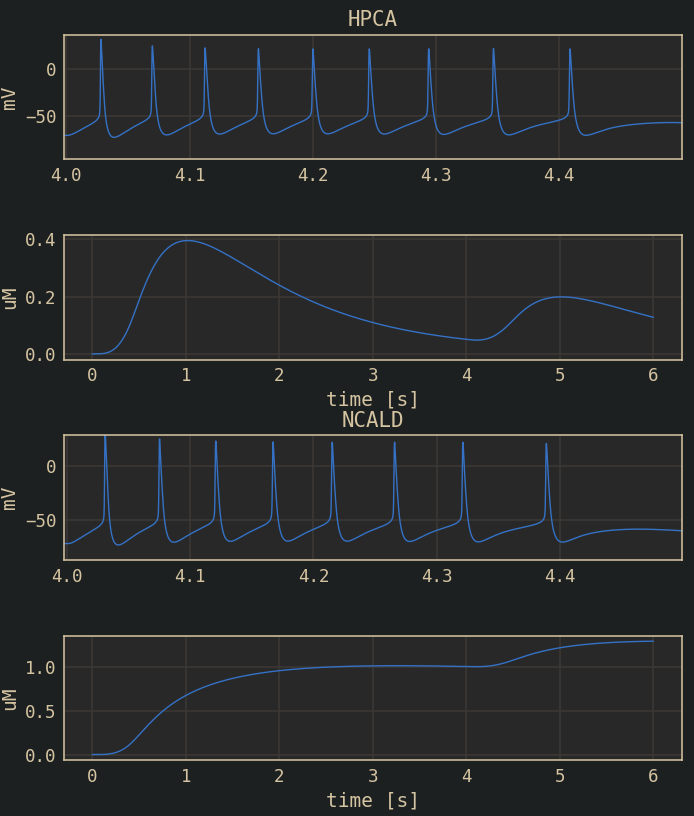

In [11]:
ic.num = 20
fig, axes = plt.subplots(4,1, figsize=(10,10))

h.k8HPCA_hpca = 0.002
h.finitialize()
h.continuerun(6000 * ms)
v_hpca = v_soma
hpca = hpca_m*1000
axes[0].plot(t/1000, v_soma, lw=1)
axes[1].plot(t/1000, hpca_m*1000, lw=1)

h.k8HPCA_hpca = 7.7e-5
h.finitialize()
h.continuerun(6000 * ms)
v_ncald = v_soma
ncald = hpca_m*1000
axes[2].plot(t/1000, v_soma, lw=1)
axes[3].plot(t/1000, hpca_m*1000, lw=1)


axes[0].set_title("HPCA")
axes[2].set_title("NCALD")
axes[0].set(ylabel="mV")
axes[1].set(xlabel="time [s]", ylabel="uM")
axes[2].set(ylabel="mV")
axes[3].set(xlabel="time [s]", ylabel="uM")

plt.tight_layout()
plt.show()

In [38]:
with open('AlphaSyn_Ipulses_ISI_soma_100APs.p', 'wb') as f:
    pickle.dump({'t': t, 'v_hpca': v_hpca, 'v_ncald': v_ncald,
                 'hpca': hpca, 'ncald': ncald}, f)

<IPython.core.display.Javascript object>


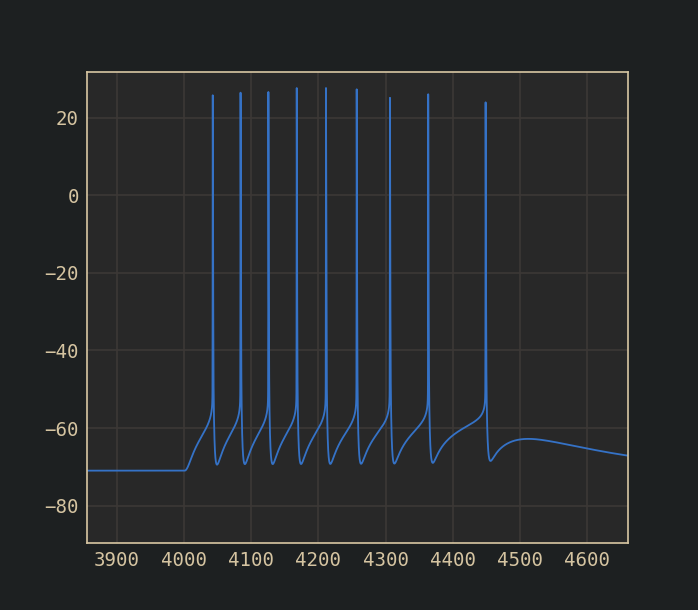

In [7]:
with open('Results/AlphaSyn_Ipulses_ISI/AlphaSyn_Ipulses_ISI_soma_50APs.p', 'rb') as f:
    data = pickle.load(f)
tnew = data['t']
vnew_hpca = data['v_hpca']
vnew_ncald = data['v_ncald']
new_hpca = data['hpca']
new_ncald = data['ncald']

plt.plot(tnew, vnew_ncald)
plt.show()